<a href="https://colab.research.google.com/github/ralphpatrick/sales_predictions/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing pandas
import pandas as pd
import numpy as np
filename = '/content/sales_predictions_2023.csv'

df = pd.read_csv(filename)
df.head(3)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [5]:
#1) How many rows and columns?
df.shape

(8523, 12)

8523 Rows and 12 Columns

In [6]:
# 2) What are the datatypes of each variable?

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

No Duplicates

In [8]:
# 4) Identify missing values.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
# 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3383,NCA53,11.395,Low Fat,0.009878,Health and Hygiene,47.6034,OUT046,1997,Small,Tier 1,Supermarket Type1,1312.2918
5974,DRG01,NaN,Low Fat,0.078576,Soft Drinks,78.4670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
4964,FDF29,NaN,Regular,0.019838,Frozen Foods,128.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3,1687.8030
3628,FDE40,15.600,Regular,0.000000,Dairy,62.4194,OUT018,2009,Medium,Tier 3,Supermarket Type2,804.9522
1303,FDK43,NaN,Low Fat,0.046995,Meat,125.8020,OUT019,1985,Small,Tier 1,Grocery Store,253.0040
1434,FDR46,NaN,Low Fat,0.244102,Snack Foods,148.0760,OUT019,1985,Small,Tier 1,Grocery Store,146.4760
6955,NCN19,NaN,Low Fat,0.021185,Others,189.5530,OUT019,1985,Small,Tier 1,Grocery Store,379.5060
1324,FDO23,NaN,Low Fat,0.256375,Breads,94.8436,OUT019,1985,Small,Tier 1,Grocery Store,567.2616
2133,FDS57,15.500,Low Fat,0.103603,Snack Foods,143.5470,OUT049,1999,Medium,Tier 1,Supermarket Type1,1431.4700
4655,FDQ51,16.000,Regular,0.029377,Meat,46.1718,OUT010,1998,NaN,Tier 3,Grocery Store,94.5436


In [11]:
# NaN values turned into 0.00 float64
df.loc[:,'Item_Weight'].fillna(0.00, inplace=True)

In [12]:
df.loc[0:20,'Item_Weight']

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7      0.000
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18     0.000
19    13.350
20    18.850
Name: Item_Weight, dtype: float64

In [13]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
isnamask = df['Outlet_Size'].isna()
df[isnamask]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [15]:
df.shape

(8523, 12)

In [16]:
# NaN values turned into None object
df.loc[:,'Outlet_Size'].fillna('None', inplace=True)

In [17]:
#now groupby
df.groupby(['Outlet_Size','Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()

Outlet_Size  Outlet_Establishment_Year
High         1987                         2.142664e+06
Medium       1985                         3.453926e+06
             1999                         2.183970e+06
             2009                         1.851823e+06
None         1998                         1.883402e+05
             2002                         2.036725e+06
             2007                         2.167465e+06
Small        1985                         1.796941e+05
             1997                         2.118395e+06
             2004                         2.268123e+06
Name: Item_Outlet_Sales, dtype: float64

In [18]:
# 6. Confirm that there are no missing values after addressing them.

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#  7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
#change Item_Fat_Content to consistent data 1

df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
#change Item_Fat_Content to consistent data 2

df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [24]:
#change Item_Fat_Content to consistent data 3

df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
# 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

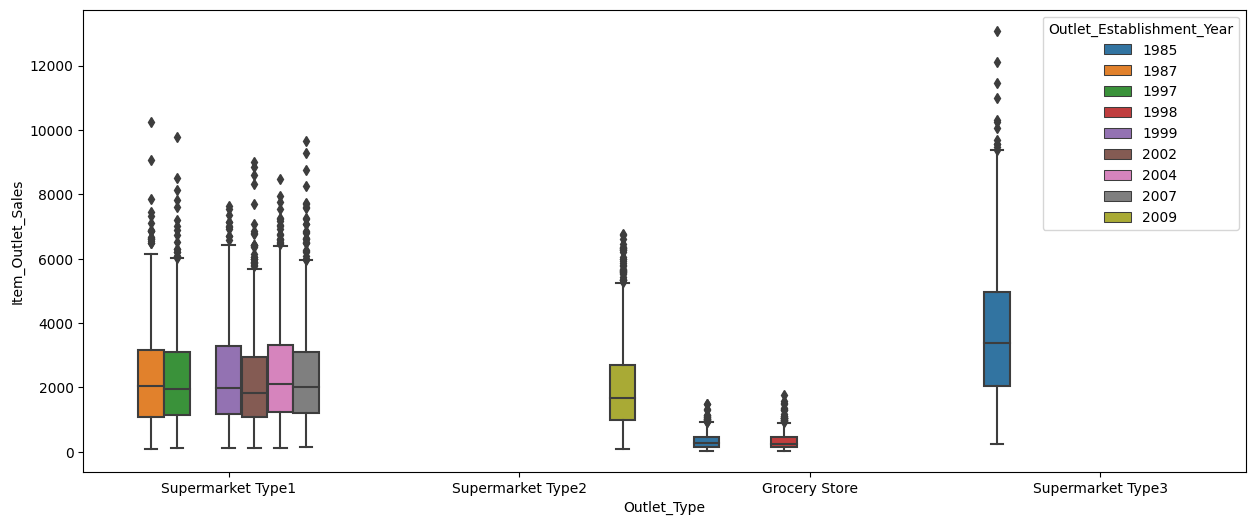

In [37]:
# The establishment date of the store with the highest sales is 1985
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, hue='Outlet_Establishment_Year')

<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

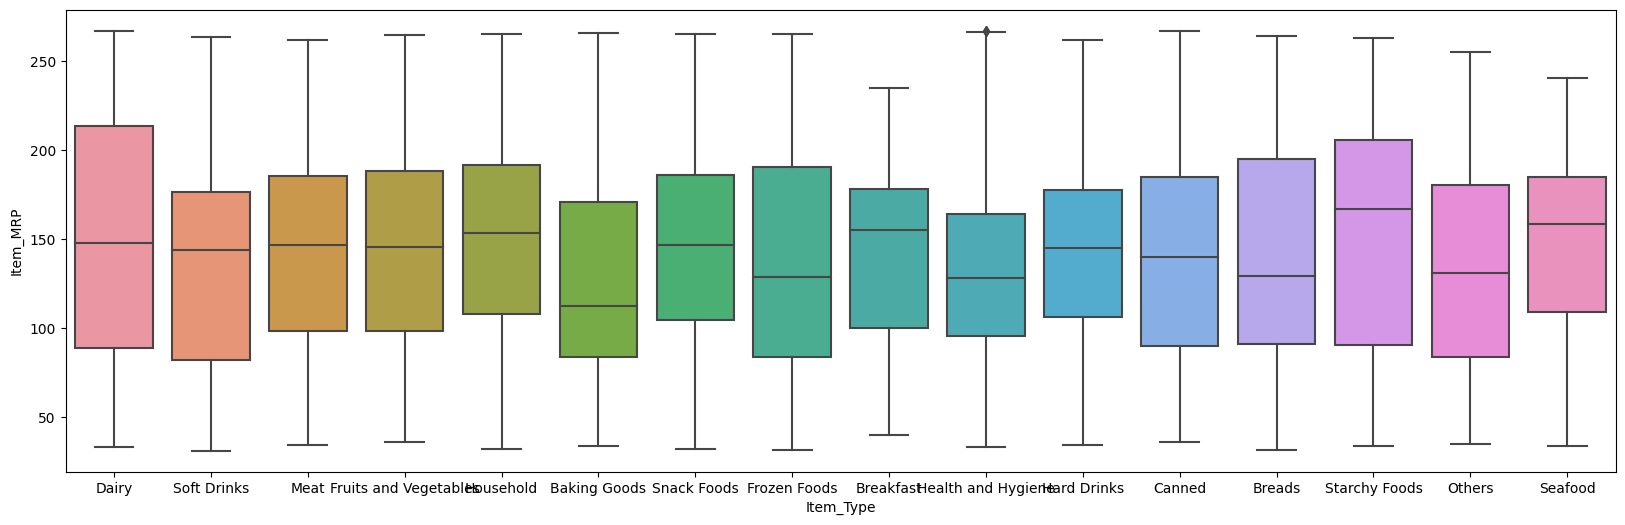

In [36]:
# The highest MRP are starchy foods
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)